## Model comparinson

Define hypothesis about which combination would work best. Evaluate hypothesis with this code.

In [ ]:
import torch
import tensorflow as tf

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [ ]:
%load_ext autoreload
%autoreload 2 # Reload all modules automatically before every cell execution.
from data_loader import load_image_data
import config

X_train, X_val, y_train, y_val, label_map = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(299, 299),
    images_per_label=20,
    validation_split=0.2
)

In [14]:
%load_ext autoreload
%autoreload 2
from model_benchmark import evaluate_models

results = evaluate_models(
    csv_path=config.CSV_FILE,
    img_size=(299, 299),
    epochs=10
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/src/model_benchmark.py:102: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = bmodel(weights='imagenet', include_top=False, input_shape=img_size + (3,))


Training MobileNetV2 with head simple...
Evaluating MobileNetV2 with head simple...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Training MobileNetV2 with head dense_dropout...
Evaluating MobileNetV2 with head dense_dropout...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Training MobileNetV2 with head batchnorm_dropout...
Evaluating MobileNetV2 with head batchnorm_dropout...
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
Training MobileNetV2 with head conv...
Evaluating MobileNetV2 with head conv...
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,backbone,head,accuracy,f1_score,end_val_loss,loss,val_loss,y_true,y_pred,label_map
1,MobileNetV2,dense_dropout,0.716667,0.720582,0.810542,"[3.316662549972534, 2.7910118103027344, 2.5950...","[1.9280049800872803, 1.6286604404449463, 1.333...","[1, 0, 3, 4, 1, 2, 6, 2, 5, 0, 9, 1, 6, 10, 0,...","[1, 0, 2, 4, 0, 9, 8, 2, 5, 0, 9, 1, 6, 10, 0,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
0,MobileNetV2,simple,0.700000,0.702294,0.997319,"[2.6198487281799316, 1.96102774143219, 1.49153...","[2.302791118621826, 1.9020500183105469, 1.6300...","[1, 0, 3, 4, 1, 2, 6, 2, 5, 0, 9, 1, 6, 10, 0,...","[1, 0, 3, 4, 0, 9, 8, 2, 5, 1, 9, 1, 6, 11, 0,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
3,MobileNetV2,conv,0.666667,0.660724,3.043086,"[9.050995826721191, 3.123501777648926, 3.21903...","[2.9838247299194336, 2.0715839862823486, 1.994...","[1, 0, 3, 4, 1, 2, 6, 2, 5, 0, 9, 1, 6, 10, 0,...","[1, 0, 3, 4, 13, 2, 8, 2, 5, 1, 9, 1, 8, 10, 1...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
2,MobileNetV2,batchnorm_dropout,0.566667,0.553141,1.850008,"[2.6938445568084717, 0.9630886316299438, 0.595...","[2.898517370223999, 2.406012535095215, 1.93161...","[1, 0, 3, 4, 1, 2, 6, 2, 5, 0, 9, 1, 6, 10, 0,...","[1, 0, 3, 3, 0, 9, 8, 2, 9, 0, 9, 1, 9, 11, 0,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."


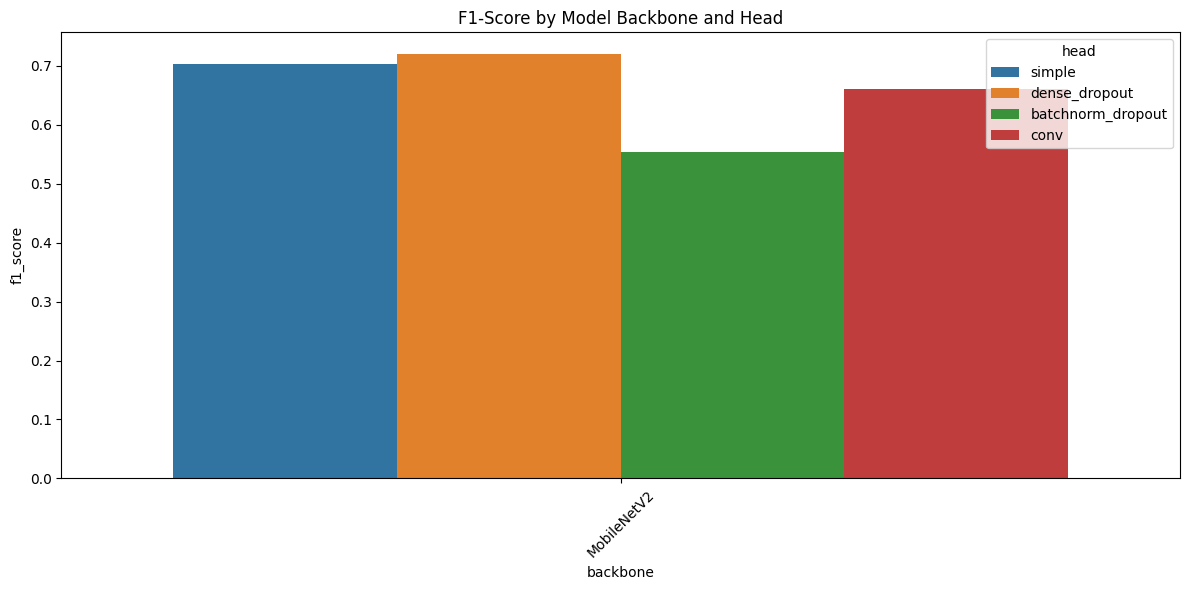

Model: MobileNetV2 + simple, F1-Score: 70.23%, Accuracy: 70.00%, Final Val_loss: 99.73%


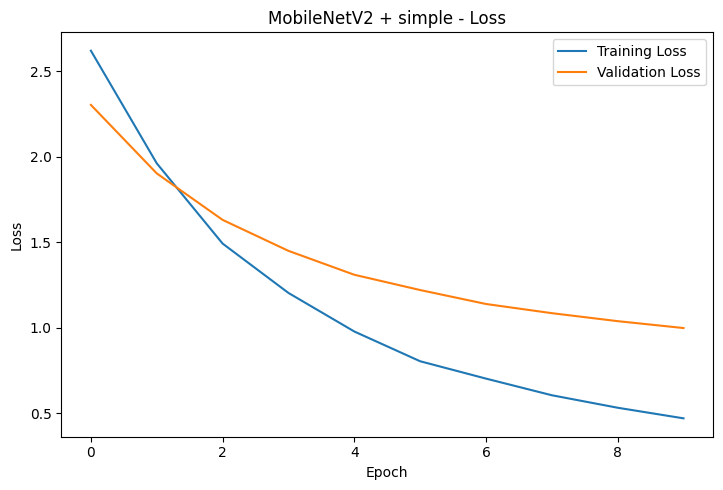

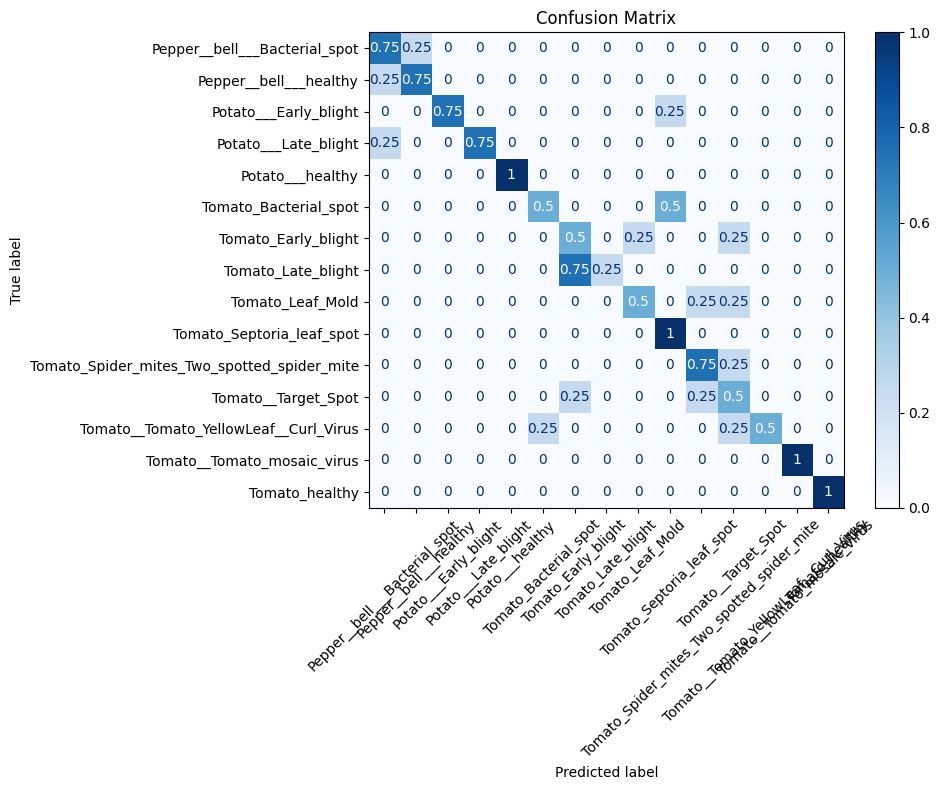

Model: MobileNetV2 + dense_dropout, F1-Score: 72.06%, Accuracy: 71.67%, Final Val_loss: 81.05%


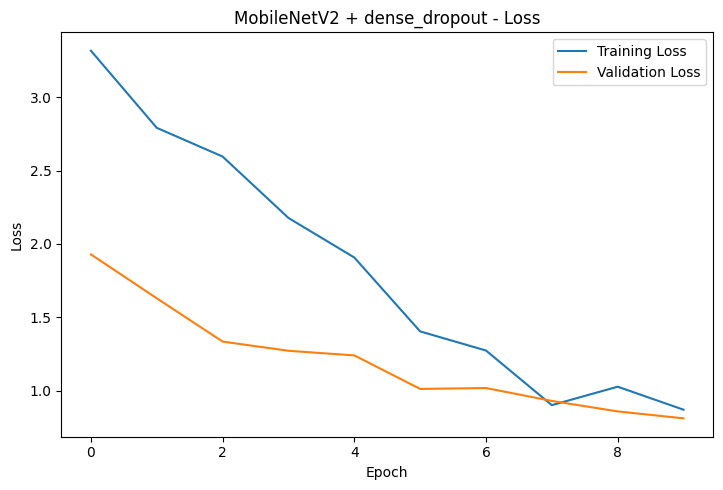

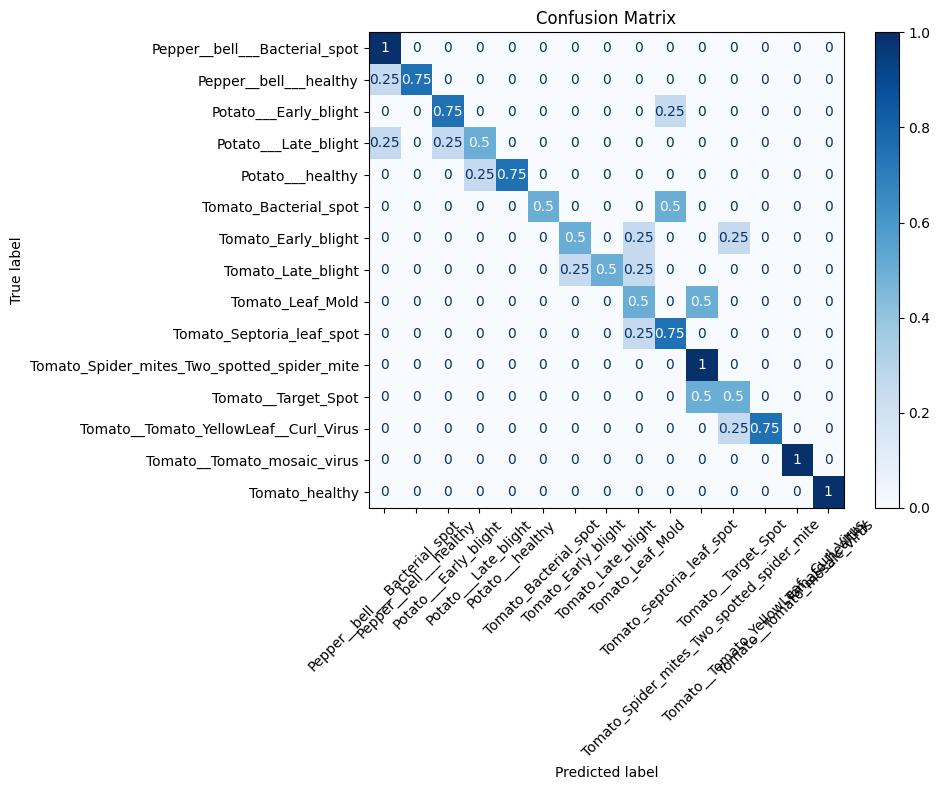

Model: MobileNetV2 + batchnorm_dropout, F1-Score: 55.31%, Accuracy: 56.67%, Final Val_loss: 185.00%


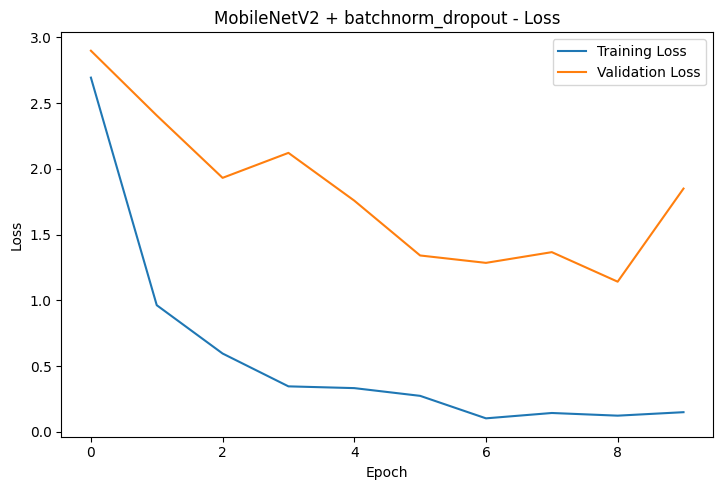

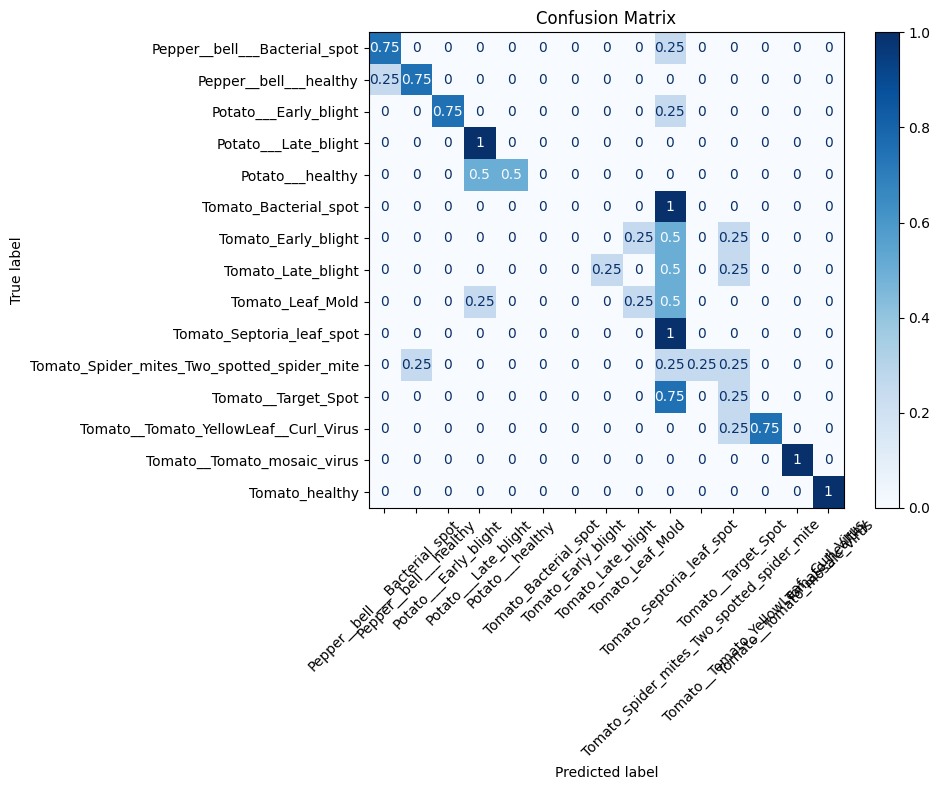

Model: MobileNetV2 + conv, F1-Score: 66.07%, Accuracy: 66.67%, Final Val_loss: 304.31%


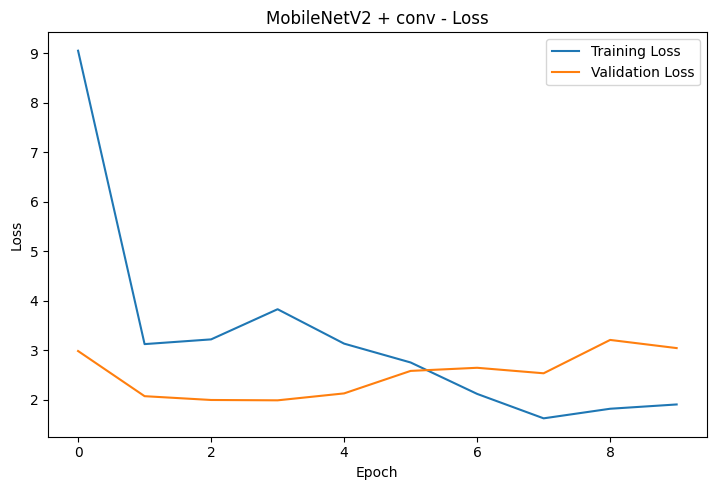

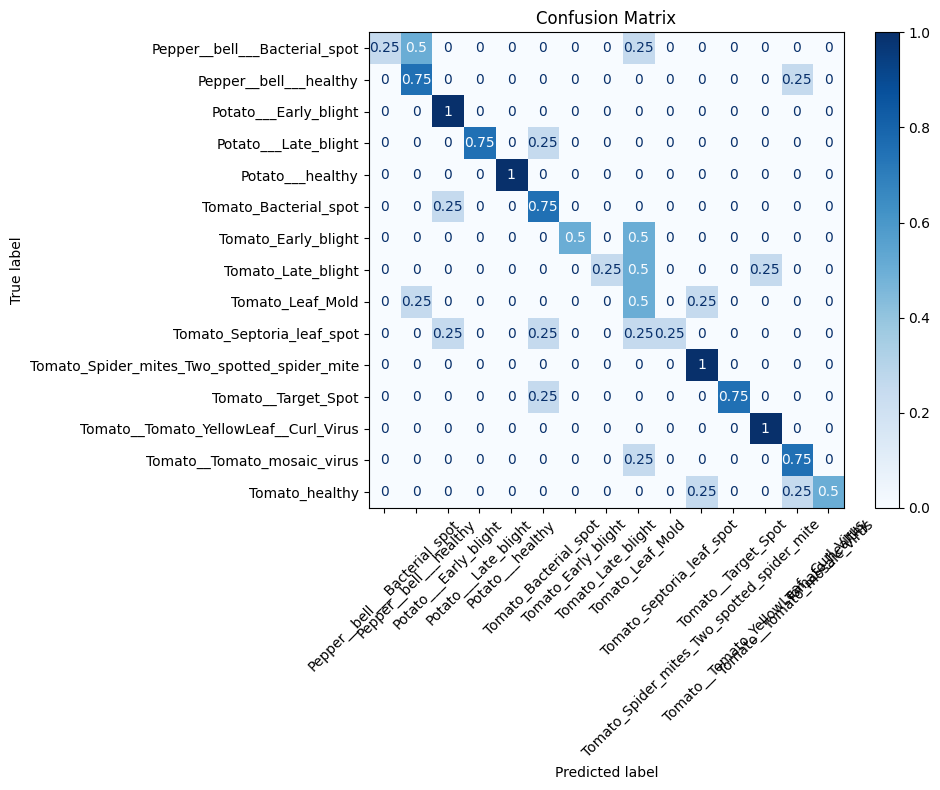

In [15]:
%load_ext autoreload
%autoreload 2

# Display results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.loss, result.val_loss, model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(result.label_map.keys()),
        normalize='true'
    )